# Visualisation optimisation bayésienne pour régression logistique

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("./bayes/softmax_regression_optimization_results.csv")
df.fillna(0, inplace=True)

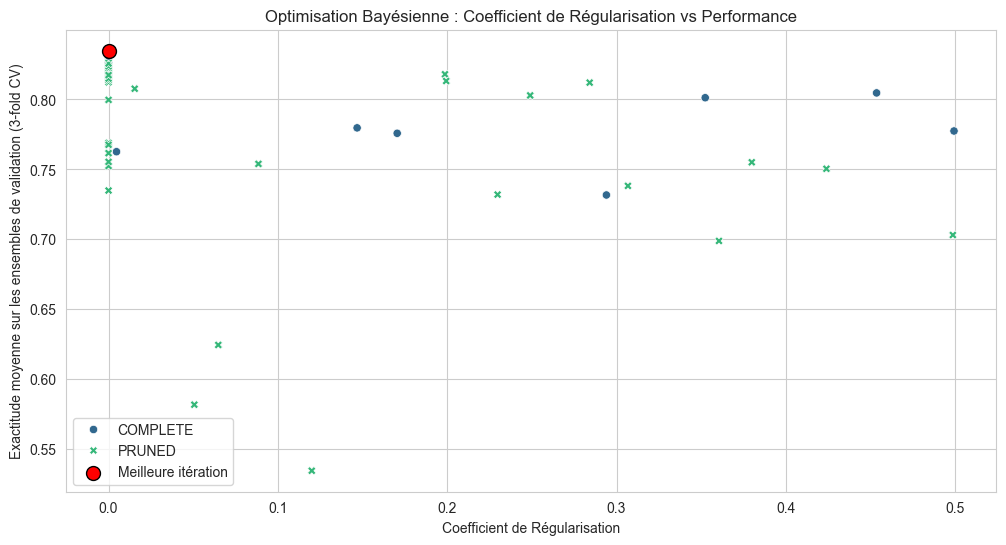

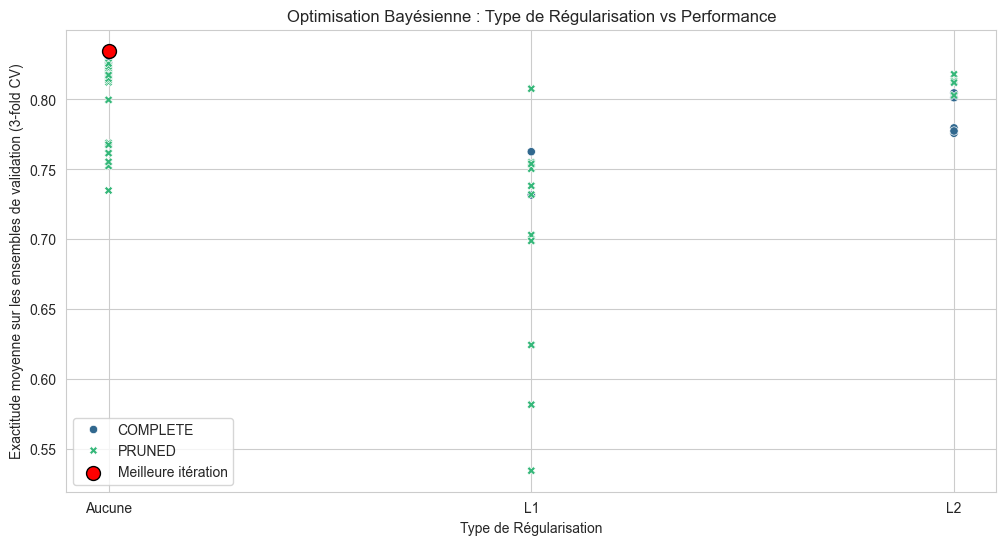

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it is already loaded

# Convert the string dates to datetime objects for possible use later
df['datetime_start'] = pd.to_datetime(df['datetime_start'])
df['datetime_complete'] = pd.to_datetime(df['datetime_complete'])

# Replace NaN values with 0 in the DataFrame
df.fillna(0, inplace=True)

# Map the regularization index to the corresponding regularization types
regularization_types = {0: 'Aucune', 1: 'L1', 2: 'L2'}
df['params_regularization_type'] = df['params_regularization_index'].map(regularization_types)

# Convert 'params_regularization_type' to a categorical type with the desired order
df['params_regularization_type'] = pd.Categorical(
    df['params_regularization_type'],
    categories=['Aucune', 'L1', 'L2'],
    ordered=True
)

# Find the row number where the best 'value' is located
best_iteration = df['value'].idxmax()

# Create a scatter plot for params_reg_coeff vs value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='params_reg_coeff', y='value', hue='state', style='state', palette='viridis')

# Highlight the best iteration with a different marker and color
plt.scatter(df.loc[best_iteration, 'params_reg_coeff'], df.loc[best_iteration, 'value'], color='red', s=100, edgecolor='black', zorder=5, label='Meilleure itération')

# Add a title and labels to the plot
plt.title('Optimisation Bayésienne : Coefficient de Régularisation vs Performance')
plt.xlabel('Coefficient de Régularisation')
plt.ylabel('Exactitude moyenne sur les ensembles de validation (3-fold CV)')
plt.legend()
plt.show()

# Repeat for params_regularization_type vs value with the specified order
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='params_regularization_type',
    y='value',
    hue='state',
    style='state',
    palette='viridis'
)

# Highlight the best iteration with a different marker and color
plt.scatter(
    df.loc[best_iteration, 'params_regularization_type'],
    df.loc[best_iteration, 'value'],
    color='red',
    s=100,
    edgecolor='black',
    zorder=5,
    label='Meilleure itération'
)

# Add a title and labels to the plot
plt.title('Optimisation Bayésienne : Type de Régularisation vs Performance')
plt.xlabel('Type de Régularisation')
plt.ylabel('Exactitude moyenne sur les ensembles de validation (3-fold CV)')
plt.legend()
plt.show()

# Visualisation optimisation bayésienne pour le modèle XGBoost

In [60]:
df = pd.read_csv("./bayes/xgb_optimization_results.csv")
df.fillna(0, inplace=True)

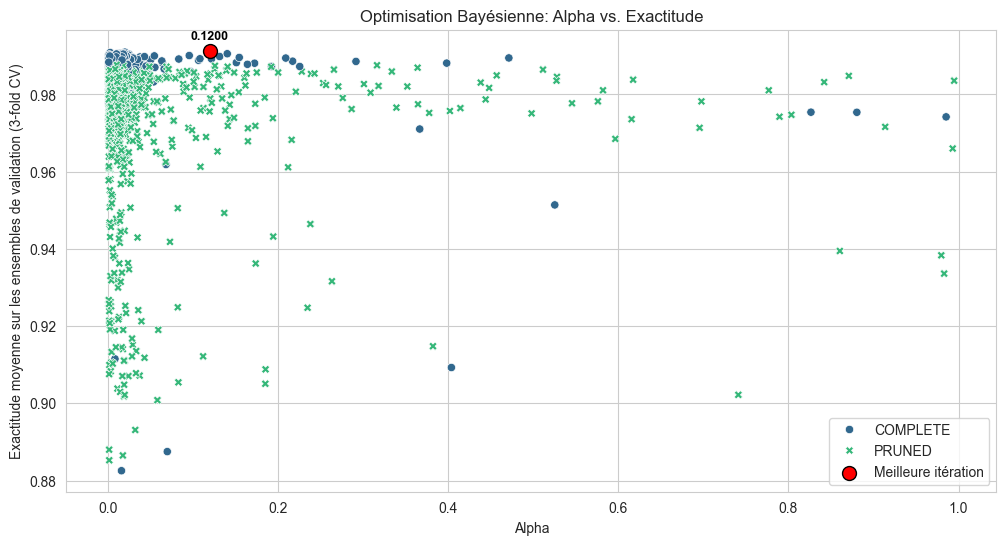

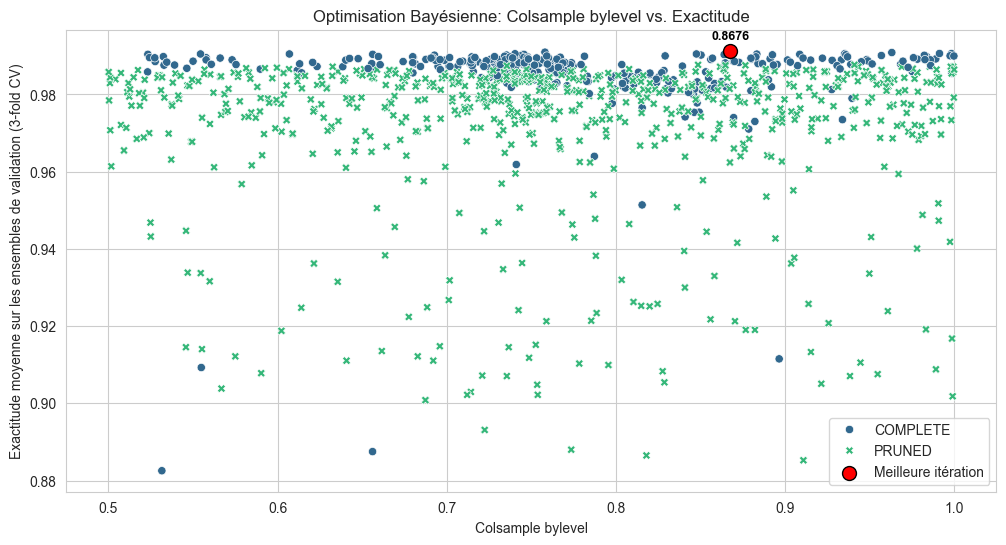

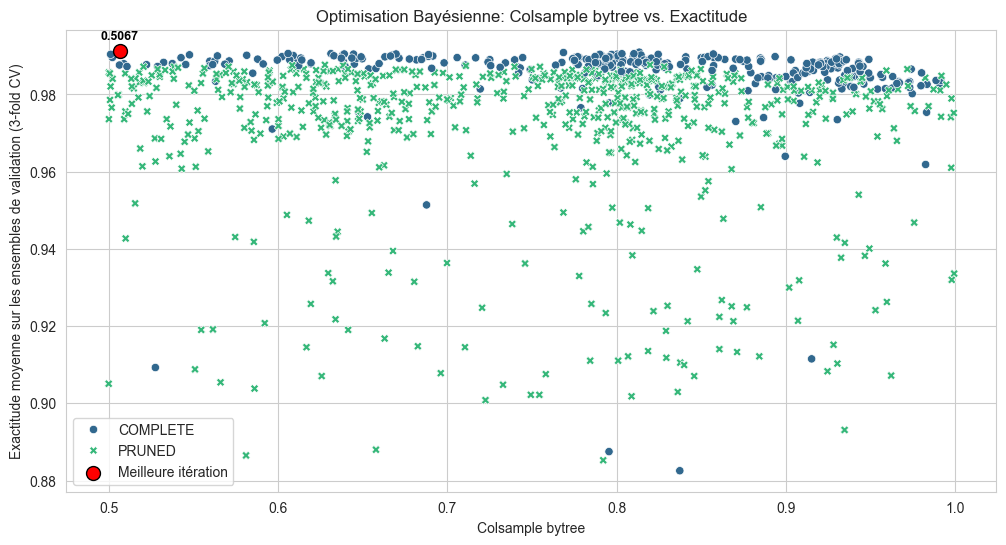

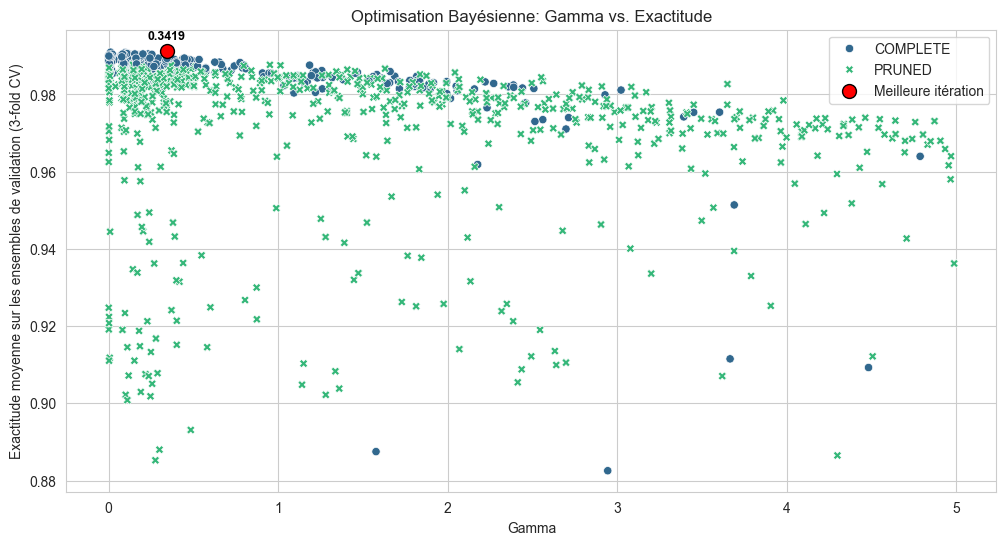

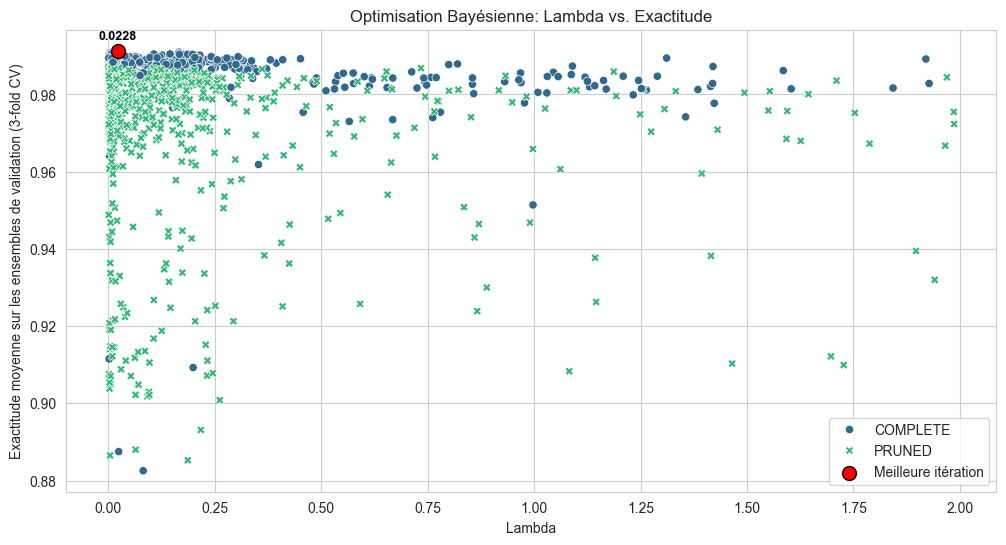

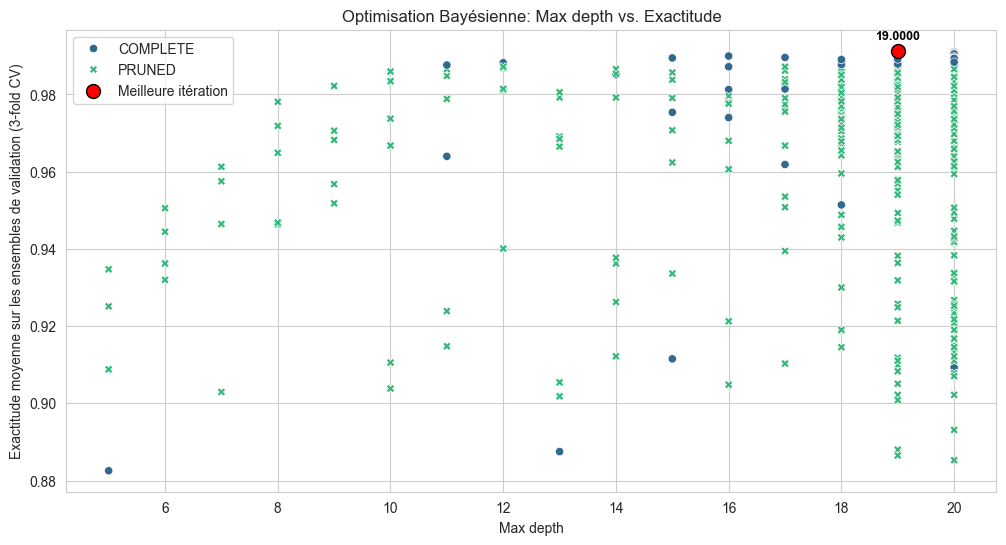

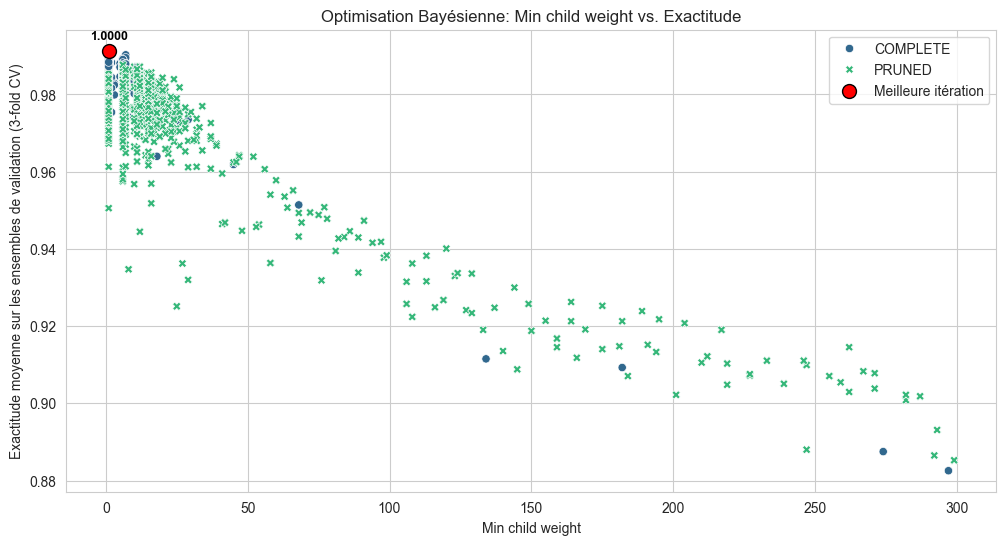

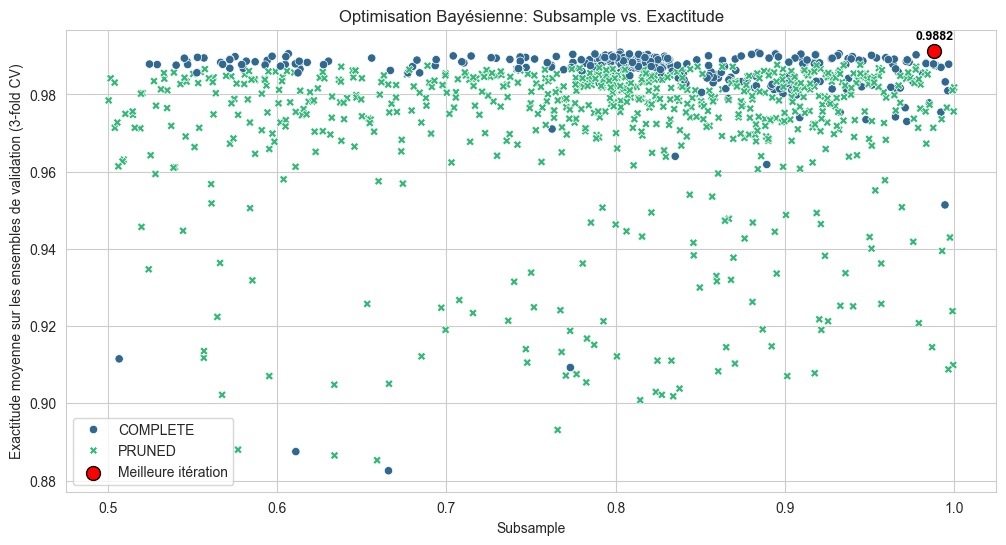

In [61]:
# Find the row number where the best 'value' is located
best_iteration = df['value'].idxmax()

# Get all columns that start with 'params_' and are numerical
params_columns = [col for col in df.columns if col.startswith('params_') and pd.api.types.is_numeric_dtype(df[col])]

# Loop through the parameter columns and create scatter plots
for param in params_columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=param, y='value', hue='state', style='state', palette='viridis')

    # Highlight the best iteration with a different marker and color
    best_value = df.loc[best_iteration, 'value']
    best_param_value = df.loc[best_iteration, param]

    if pd.api.types.is_numeric_dtype(best_param_value):
        plt.scatter(best_param_value, best_value, color='red', s=100, edgecolor='black', zorder=5, label='Meilleure itération')
        # Adjust the position of the text slightly above and centered on the point
        vertical_offset = (df['value'].max() - df['value'].min()) * 0.02  # 2% of the value range for vertical offset
        plt.text(best_param_value, best_value + vertical_offset, f'{best_param_value:.4f}', 
                 color='black', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Format the title to replace underscores with spaces and remove 'params_'
    formatted_param = ' '.join(param.replace('params_', '').split('_')).capitalize()

    # Add a title and labels to the plot
    plt.title(f'Optimisation Bayésienne: {formatted_param} vs. Exactitude')
    plt.xlabel(formatted_param)
    plt.ylabel('Exactitude moyenne sur les ensembles de validation (3-fold CV)')
    plt.legend()
    plt.show()